In [74]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
def datos_prueba(t_max:float, dt:float, amplitudes:NDArray[float], 
                 frecuencias:NDArray[float], ruido:float=0.0) -> NDArray[float]:
    ts = np.arange(0.,t_max,dt)
    ys = np.zeros_like(ts,dtype=float)
    for A,f in zip(amplitudes,frecuencias):
        ys += A*np.sin(2*np.pi*f*ts)
    ys += np.random.normal(loc=0,size=len(ys),scale=ruido) if ruido else 0
    return (ts,ys)

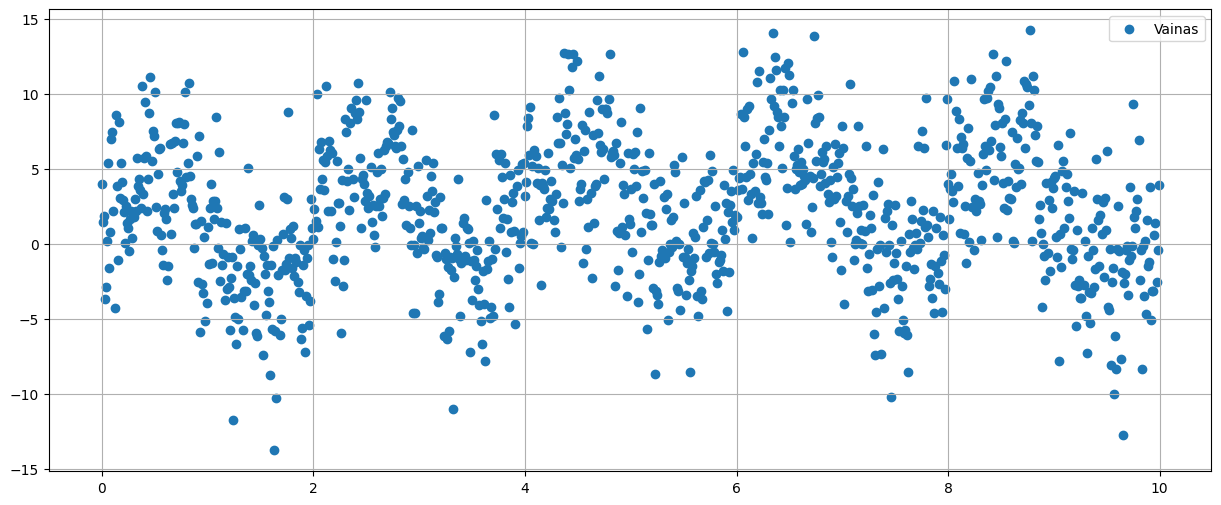

/var/folders/2g/lzkw6wx57k5fk4j7x71sq2sr0000gn/T/ipykernel_2300/3421360385.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


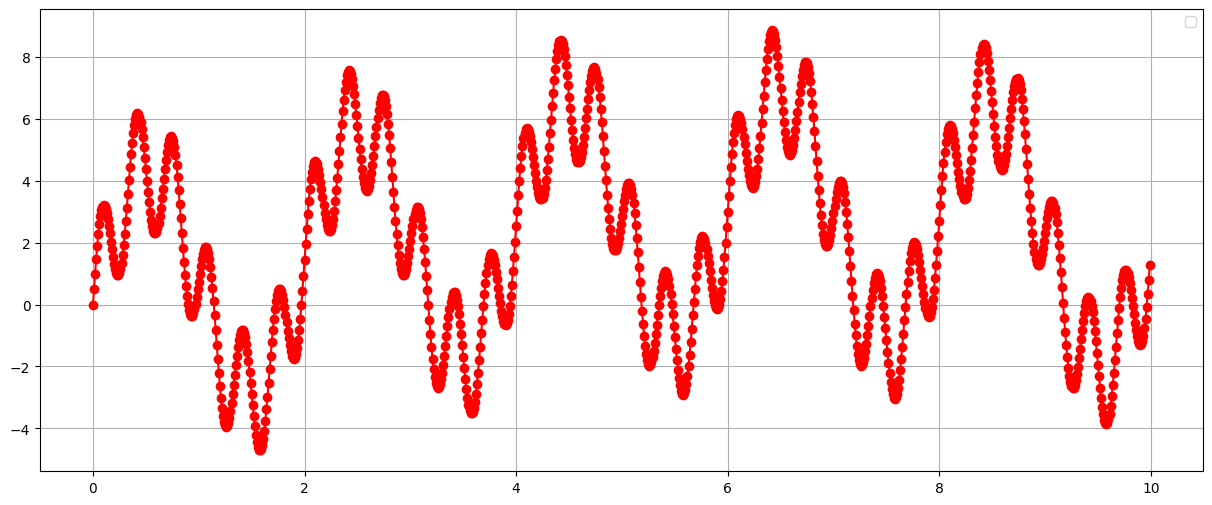

In [92]:
t_max = 10
dt = 0.01
amplitudes = [2,3,4]
frecuencias = [3,0.04,0.5]

senales_1 = datos_prueba(t_max,dt,amplitudes,frecuencias,ruido=3)
senales_2 = datos_prueba(t_max,dt,amplitudes,frecuencias,ruido=0)

plt.figure(figsize=(15,6))
plt.scatter(senales_1[0],senales_1[1],label = 'Vainas')
plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(15,6))
plt.plot(senales_2[0],senales_2[1],marker='o',color='r')
plt.grid()
plt.legend()
plt.show()




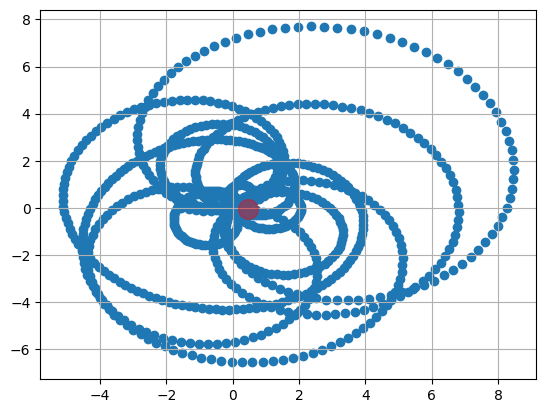

In [76]:
def img_rep(funcion,frecuencia,tiempo)->None:
    polar = funcion*np.exp(-2j*np.pi*frecuencia*tiempo)
    plt.scatter(polar.real,polar.imag)
    plt.scatter(polar.mean().real,polar.mean().imag,c='r',s=200,zorder=10,alpha=0.4)
    plt.grid()
    plt.show()

def CM(funcion,freq,tiempo):
    N = len(funcion[1])
    freq
    

'''
picos(senales_2,tiempo,1/3)'''
tiempo = np.linspace(0,15,1000)
img_rep(senales_2[1],1/2,tiempo)


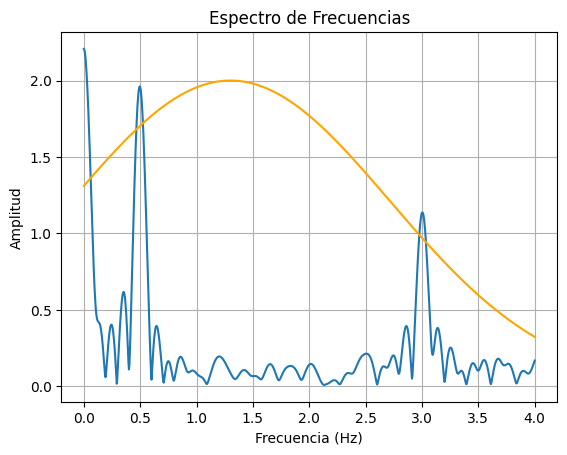

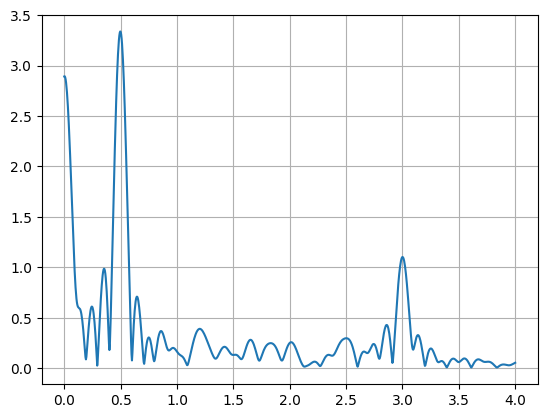

In [170]:
def Fourier(t:NDArray[float], y:NDArray[float], 
            f:NDArray[float]) -> NDArray[complex]:
    
    fourier_list = []  # Lista para almacenar la transformada de cada frecuencia
    
    for freq in f:
        fu = 0  # Inicializamos el acumulador para la suma en cada frecuencia
        for k in range(len(t)):
            fu += y[k] * np.exp(-2j * np.pi * freq * t[k])  # Suma compleja
        fourier_list.append(abs(fu)/len(t))  # Magnitud de la transformada
    
    # Graficar el espectro de frecuencias
    nyquist = 1/0.01
    plt.plot(f, fourier_list)
    plt.plot(f,2*np.exp(-((f-1.3)/2)**2),color='orange')
    #plt.axvline(x=nyquist, color='r', linestyle='--')
    plt.title("Espectro de Frecuencias")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Amplitud")
    plt.grid()
    plt.show()
    
    return fourier_list

nyquist = 1/dt
ts = senales_2[0]
#freq = np.fft.rfftfreq(len(ts),ts[1]-ts[0])
frequ = np.linspace(0,4,1000)
#Fourier(senales_1[0],senales_1[1],frequ)
F1=Fourier(senales_1[0],senales_1[1],frequ)
FF = 2*np.exp(-((frequ-1.3)/2)**2)
FFC = F1*FF
plt.plot(frequ,FFC)
plt.grid()
plt.show()
